In [264]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv


**2 TASKS ARE TO BE DONE**

**1) TRAIN THE ORIGINAL DATASET USING SIMPLE LINEAR REGRESSION MODEL AND PREDICT THE SALARY FROM A NEW DATASET.***

**2) DIVIDE THE ORIGINAL DATASET INTO 80% AND 20%. TRAIN THE 80% TRAINING DATA USING SIMPLE LINEAR REGRESSION MODEL AND THEN TEST THE REMAINING 20% DATA USING THAT MODEL AND COMPARE THE PREDICTED PRICE AND ORIGINAL PRICE.**

**Importing modules and loading csv files**

In [265]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import r2_score

df = pd.read_csv('/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv')

**Some Information about the dataset**

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [267]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Number of Rows and Columns**

In [268]:
print("Number of Rows present:", len(df))
print("Number of Columns present:", len(df.columns))

Number of Rows present: 30
Number of Columns present: 2


**Changing the name of Salary column**

**TASK 1**

In [269]:
df['Salary (Rs)'] = df['Salary']
df.drop(columns=['Salary'],inplace = True)
df.head()

,YearsExperience,Salary (Rs)
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Visualisation of the dataset**

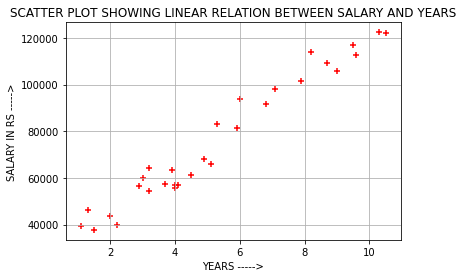

In [270]:
%matplotlib inline
plt.scatter(df['YearsExperience'],df['Salary (Rs)'],color='red',marker='+')
plt.xlabel('YEARS ----->')
plt.ylabel('SALARY IN RS ----->')
plt.title('SCATTER PLOT SHOWING LINEAR RELATION BETWEEN SALARY AND YEARS')
plt.grid(True)

**Changing the x-axis (years) as a DataFrame and y-axis (salary) as a Series**

In [271]:
new_df = df.drop('Salary (Rs)',axis='columns')
new_df

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [272]:
salary = df['Salary (Rs)']
salary

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary (Rs), dtype: float64

**Using Linear Regression Model**

In [273]:
reg = linear_model.LinearRegression()
reg.fit(new_df,salary)

LinearRegression()

**Prediciting the salary of an employee having 5 years of experience**

In [274]:
reg.predict([[5]])


array([73042.01180594])

**Salary in Rupees(Rs)**

In [275]:
print("Rs " + str((reg.predict([[5]])[0]))[:9])


Rs 73042.011


**Accuracy of the Model**

In [276]:
print(str(reg.score(new_df,salary)*100)[:6]+" %")

95.695 %


**Slope and Intercept of Line of Best Fit**

In [277]:
m,b = np.polyfit(df['YearsExperience'],df['Salary (Rs)'],1)
print(m,b)

9449.962321455077 25792.200198668706


**Line of Best Fit**

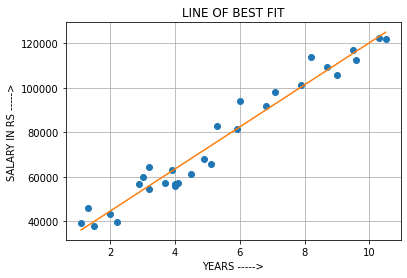

In [278]:
plt.plot(df['YearsExperience'],df['Salary (Rs)'], 'o')
plt.plot(df['YearsExperience'],m*(df['YearsExperience'])+ b)
plt.xlabel('YEARS ----->')
plt.ylabel('SALARY IN RS ----->')
plt.title('LINE OF BEST FIT')
plt.grid(True)

**##PREDICT SALARY OF THE 8 EMPLOYEES WITH YEARS OF EXPERIENCE GIVEN BELOW##**

In [279]:
DataToPredict = {'YearsExperience':[0,3.2,0.5,4.5,20,15,8,13]}
 

df2 = pd.DataFrame(DataToPredict)

**Below is the Years of Experience**

In [280]:
df2

,YearsExperience
0,0.0
1,3.2
2,0.5
3,4.5
4,20.0
5,15.0
6,8.0
7,13.0


**Using the linear regression model which we got from training the dataset we use it to predict the salary of the new YearsExperience(df2) dataset**

In [281]:
predict = reg.predict(df2)
predict

array([ 25792.20019867,  56032.07962732,  30517.1813594 ,  68317.03064522,
       214791.44662777, 167541.63502049, 101391.89877031, 148641.71037758])

**Attaching the Predicted Salary column to the new dataset**

In [282]:
df2['Predicted Salary (Rs)'] = predict

In [283]:
df2

,YearsExperience,Predicted Salary (Rs)
0,0.0,25792.200199
1,3.2,56032.079627
2,0.5,30517.181359
3,4.5,68317.030645
4,20.0,214791.446628
5,15.0,167541.635020
6,8.0,101391.898770
7,13.0,148641.710378


**TASK 2**

**CREATING TRAINING AND TESTING DATA**

In [284]:
cdf = df[['YearsExperience','Salary (Rs)']]
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

In [285]:
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary (Rs)']])

**FITTING TRAINING DATA USING SIMPLE LINEAR REGRESSION MODEL**

In [286]:
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

**SLOPE AND COEFFICIENT OF LINE OF BEST FIT**

In [287]:
m1,b1 = np.polyfit(train['YearsExperience'],train['Salary (Rs)'],1)
m1,b1

(9532.479588660033, 25341.905339586454)

**LINE OF BEST FIT FOR TRAINING DATA**

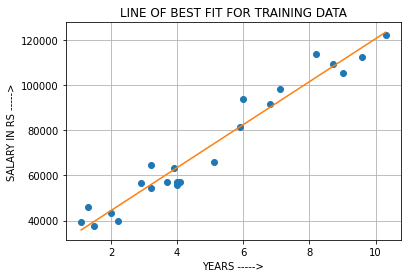

In [288]:
plt.plot(train['YearsExperience'],train['Salary (Rs)'], 'o')
plt.plot(train['YearsExperience'],m1*(train['YearsExperience'])+ b1)
plt.xlabel('YEARS ----->')
plt.ylabel('SALARY IN RS ----->')
plt.title('LINE OF BEST FIT FOR TRAINING DATA')
plt.grid(True)

In [289]:
test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary (Rs)']])

**PREDICTING USING TESTING DATA BY FITTING IN THE MODEL** 

In [290]:
test_y_pred = regr.predict(test_x)
print("R2 Score is ",r2_score(test_y_pred,test_y))
print("Mean Square Error is ", np.mean(test_y_pred-test_y)**2)
print("Acc. is ", regr.score(test_x,test_y))

R2 Score is  0.9597368403814853
Mean Square Error is  2580.54391628459
Acc. is  0.9577382474097657


**ATTACHING THE PREDICTED SALARY AND ORIGINAL SALARY IN THE TEST DATASET**

In [291]:
test['Salary Predicted (Rs)'] = test_y_pred
test

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YearsExperience,Salary (Rs),Salary Predicted (Rs)
6,3.0,60150.0,53939.344106
14,4.5,61111.0,68238.063489
15,4.9,67938.0,72051.055324
17,5.3,83088.0,75864.047159
22,7.9,101302.0,100648.494090
26,9.5,116969.0,115900.461432
29,10.5,121872.0,125432.941021
